<a href="https://colab.research.google.com/github/bghaendler/BJBS-AI-Lab/blob/master/Var_from_Fundamental_Risk_Management_Book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Historical simulation VaR
def historical_simulation_var(returns, alpha=0.05):
    sorted_returns = np.sort(returns)
    var_index = int(alpha * len(sorted_returns))
    return -sorted_returns[var_index]

# Monte Carlo simulation VaR
def monte_carlo_var(returns, alpha=0.05, num_simulations=10000):
    sim_returns = []
    for _ in range(num_simulations):
        sim_return = np.random.choice(returns, size=len(returns), replace=True)
        sim_returns.append(np.percentile(sim_return, alpha * 100))
    return -np.percentile(sim_returns, 100 * alpha)

# Generate sample returns data
returns = np.random.normal(0.001, 0.02, 250)  # Daily returns for 250 days

# Calculate VaR using Historical Simulation
hs_var = historical_simulation_var(returns)

# Calculate VaR using Monte Carlo Simulation
mc_var = monte_carlo_var(returns)

# Print the VaR results
print("Historical Simulation VaR:", hs_var)
print("Monte Carlo Simulation VaR:", mc_var)


Historical Simulation VaR: 0.030766135000333872
Monte Carlo Simulation VaR: 0.036585424325554006


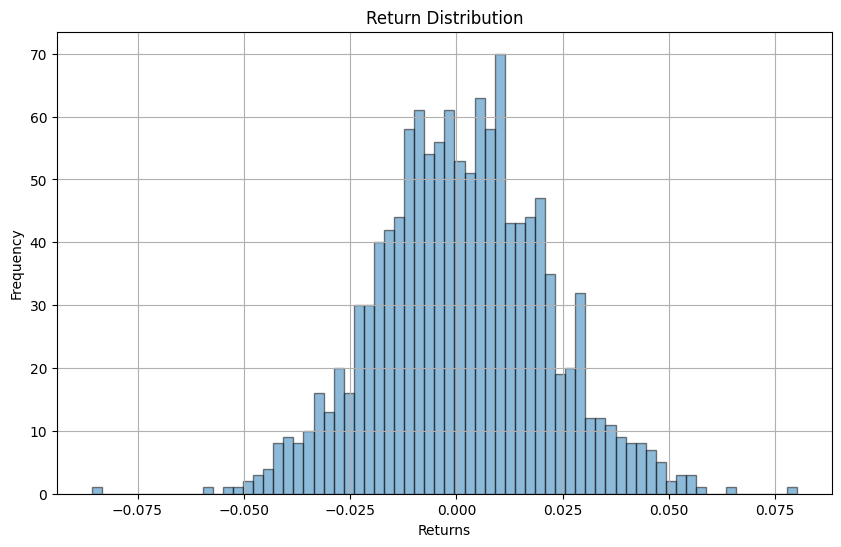

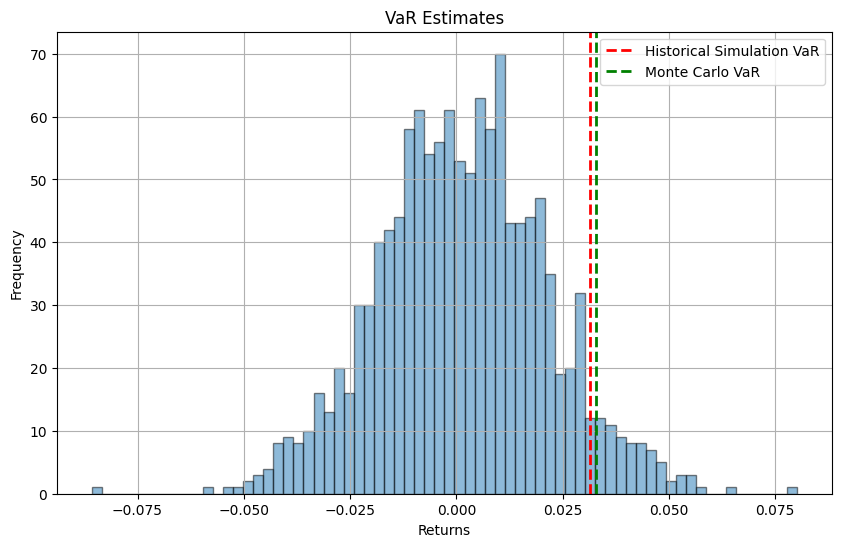

Historical Simulation VaR: 0.031532178862704624
Monte Carlo Simulation VaR: 0.03290307732356333


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Historical simulation VaR
def historical_simulation_var(returns, alpha=0.05):
    sorted_returns = np.sort(returns)
    var_index = int(alpha * len(sorted_returns))
    return -sorted_returns[var_index]

# Monte Carlo simulation VaR
def monte_carlo_var(returns, alpha=0.05, num_simulations=10000):
    sim_returns = []
    for _ in range(num_simulations):
        sim_return = np.random.choice(returns, size=len(returns), replace=True)
        sim_returns.append(np.percentile(sim_return, alpha * 100))
    return -np.percentile(sim_returns, 100 * alpha)

# Generate sample returns data
returns = np.random.normal(0.001, 0.02, 1250)  # Daily returns for 250 days

# Calculate VaR using Historical Simulation
hs_var = historical_simulation_var(returns)

# Calculate VaR using Monte Carlo Simulation
mc_var = monte_carlo_var(returns)

# Plot return distribution
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=70, edgecolor='black', alpha=0.5)
plt.title("Return Distribution")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot VaR estimates
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=70, edgecolor='black', alpha=0.5)
plt.axvline(hs_var, color='red', linestyle='dashed', linewidth=2, label='Historical Simulation VaR')
plt.axvline(mc_var, color='green', linestyle='dashed', linewidth=2, label='Monte Carlo VaR')
plt.title("VaR Estimates")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# Print the VaR results
print("Historical Simulation VaR:", hs_var)
print("Monte Carlo Simulation VaR:", mc_var)


<ipython-input-6-e7854537f777>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(returns, shade=True, ax=axes[1, 0])


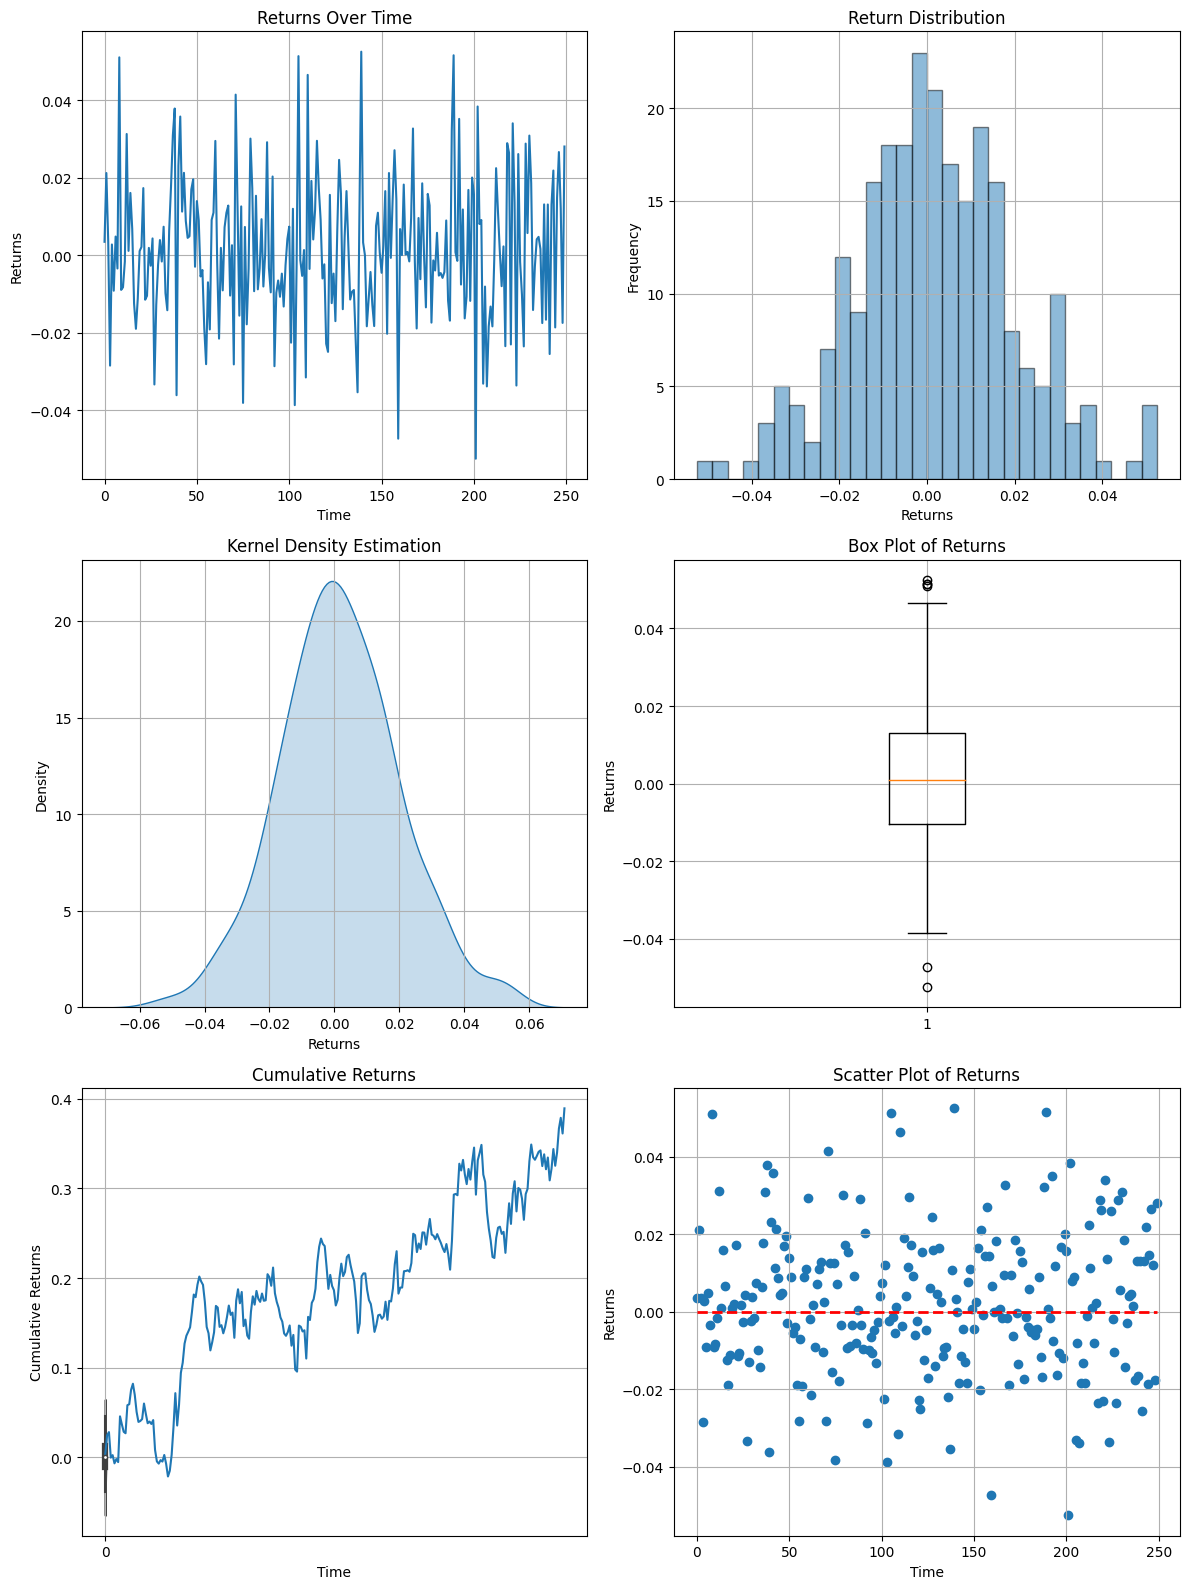

<Figure size 1000x600 with 0 Axes>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample returns data
returns = np.random.normal(0.001, 0.02, 250)  # Daily returns for 250 days

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 16))

# Line plot of returns over time
axes[0, 0].plot(returns)
axes[0, 0].set_title("Returns Over Time")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Returns")
axes[0, 0].grid(True)

# Histogram of returns
axes[0, 1].hist(returns, bins=30, edgecolor='black', alpha=0.5)
axes[0, 1].set_title("Return Distribution")
axes[0, 1].set_xlabel("Returns")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].grid(True)

# Kernel density estimation (KDE) plot
sns.kdeplot(returns, shade=True, ax=axes[1, 0])
axes[1, 0].set_title("Kernel Density Estimation")
axes[1, 0].set_xlabel("Returns")
axes[1, 0].set_ylabel("Density")
axes[1, 0].grid(True)

# Box plot
axes[1, 1].boxplot(returns)
axes[1, 1].set_title("Box Plot of Returns")
axes[1, 1].set_ylabel("Returns")
axes[1, 1].grid(True)

# Violin plot
sns.violinplot(returns, ax=axes[2, 0])
axes[2, 0].set_title("Violin Plot of Returns")
axes[2, 0].set_ylabel("Returns")
axes[2, 0].grid(True)

# Scatter plot with a line of zero returns
axes[2, 1].scatter(range(len(returns)), returns)
axes[2, 1].plot(range(len(returns)), [0] * len(returns), color='red', linestyle='dashed', linewidth=2)
axes[2, 1].set_title("Scatter Plot of Returns")
axes[2, 1].set_xlabel("Time")
axes[2, 1].set_ylabel("Returns")
axes[2, 1].grid(True)

# Adjust spacing between subplots
fig.tight_layout()

# Cumulative returns plot
cumulative_returns = np.cumsum(returns)
plt.figure(figsize=(10, 6))
axes[2, 0].plot(cumulative_returns)
axes[2, 0].set_title("Cumulative Returns")
axes[2, 0].set_xlabel("Time")
axes[2, 0].set_ylabel("Cumulative Returns")
axes[2, 0].grid(True)

# Show the figure
plt.show()


In [7]:
import numpy as np

def calculate_var(pl_distribution, alpha):
    sorted_pls = np.sort(pl_distribution)
    var_index = int(alpha * len(sorted_pls))
    return sorted_pls[var_index]

def calculate_shortfall_var(pl_distribution, alpha):
    sorted_pls = np.sort(pl_distribution)
    shortfall_var_index = int(alpha * len(sorted_pls))
    average_loss = np.mean(sorted_pls[shortfall_var_index:])
    return average_loss

# Generate profit and loss (P&L) distribution using Monte Carlo simulation
num_simulations = 10000
pl_distribution = np.random.normal(loc=0, scale=1000, size=num_simulations)

# Calculate VaR and shortfall VaR
alpha = 0.01  # 99% confidence level
var = calculate_var(pl_distribution, alpha)
shortfall_var = calculate_shortfall_var(pl_distribution, alpha)

print(f"VaR at {alpha*100}% confidence level: {var}")
print(f"Shortfall VaR at {alpha*100}% confidence level: {shortfall_var}")


VaR at 1.0% confidence level: -2344.399528353368
Shortfall VaR at 1.0% confidence level: 5.712624669713297


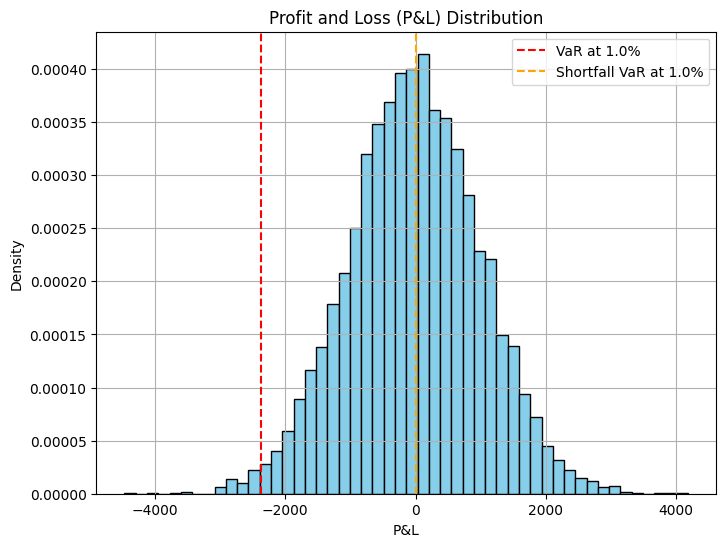

VaR at 1.0% confidence level: -2373.778159938307
Shortfall VaR at 1.0% confidence level: 13.061152127679636


In [15]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_var(pl_distribution, alpha):
    sorted_pls = np.sort(pl_distribution)
    var_index = int(alpha * len(sorted_pls))
    return sorted_pls[var_index]

def calculate_shortfall_var(pl_distribution, alpha):
    sorted_pls = np.sort(pl_distribution)
    shortfall_var_index = int(alpha * len(sorted_pls))
    average_loss = np.mean(sorted_pls[shortfall_var_index:])
    return average_loss

# Generate profit and loss (P&L) distribution using Monte Carlo simulation
num_simulations = 10000
pl_distribution = np.random.normal(loc=0, scale=1000, size=num_simulations)

# Calculate VaR and shortfall VaR
alpha = 0.01  # 99% confidence level
var = calculate_var(pl_distribution, alpha)
shortfall_var = calculate_shortfall_var(pl_distribution, alpha)

# Plot the P&L distribution
plt.figure(figsize=(8, 6))
plt.hist(pl_distribution, bins=50, density=True, color='skyblue', edgecolor='black')
plt.axvline(x=var, color='red', linestyle='--', label=f'VaR at {alpha*100}%')
plt.axvline(x=shortfall_var, color='orange', linestyle='--', label=f'Shortfall VaR at {alpha*100}%')
plt.xlabel('P&L')
plt.ylabel('Density')
plt.title('Profit and Loss (P&L) Distribution')
plt.legend()
plt.grid(True)
plt.show()

# Display VaR and shortfall VaR measures
print(f"VaR at {alpha*100}% confidence level: {var}")
print(f"Shortfall VaR at {alpha*100}% confidence level: {shortfall_var}")


<ipython-input-16-6f4c9edaf71c>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(returns, shade=True, ax=axes[1, 0])


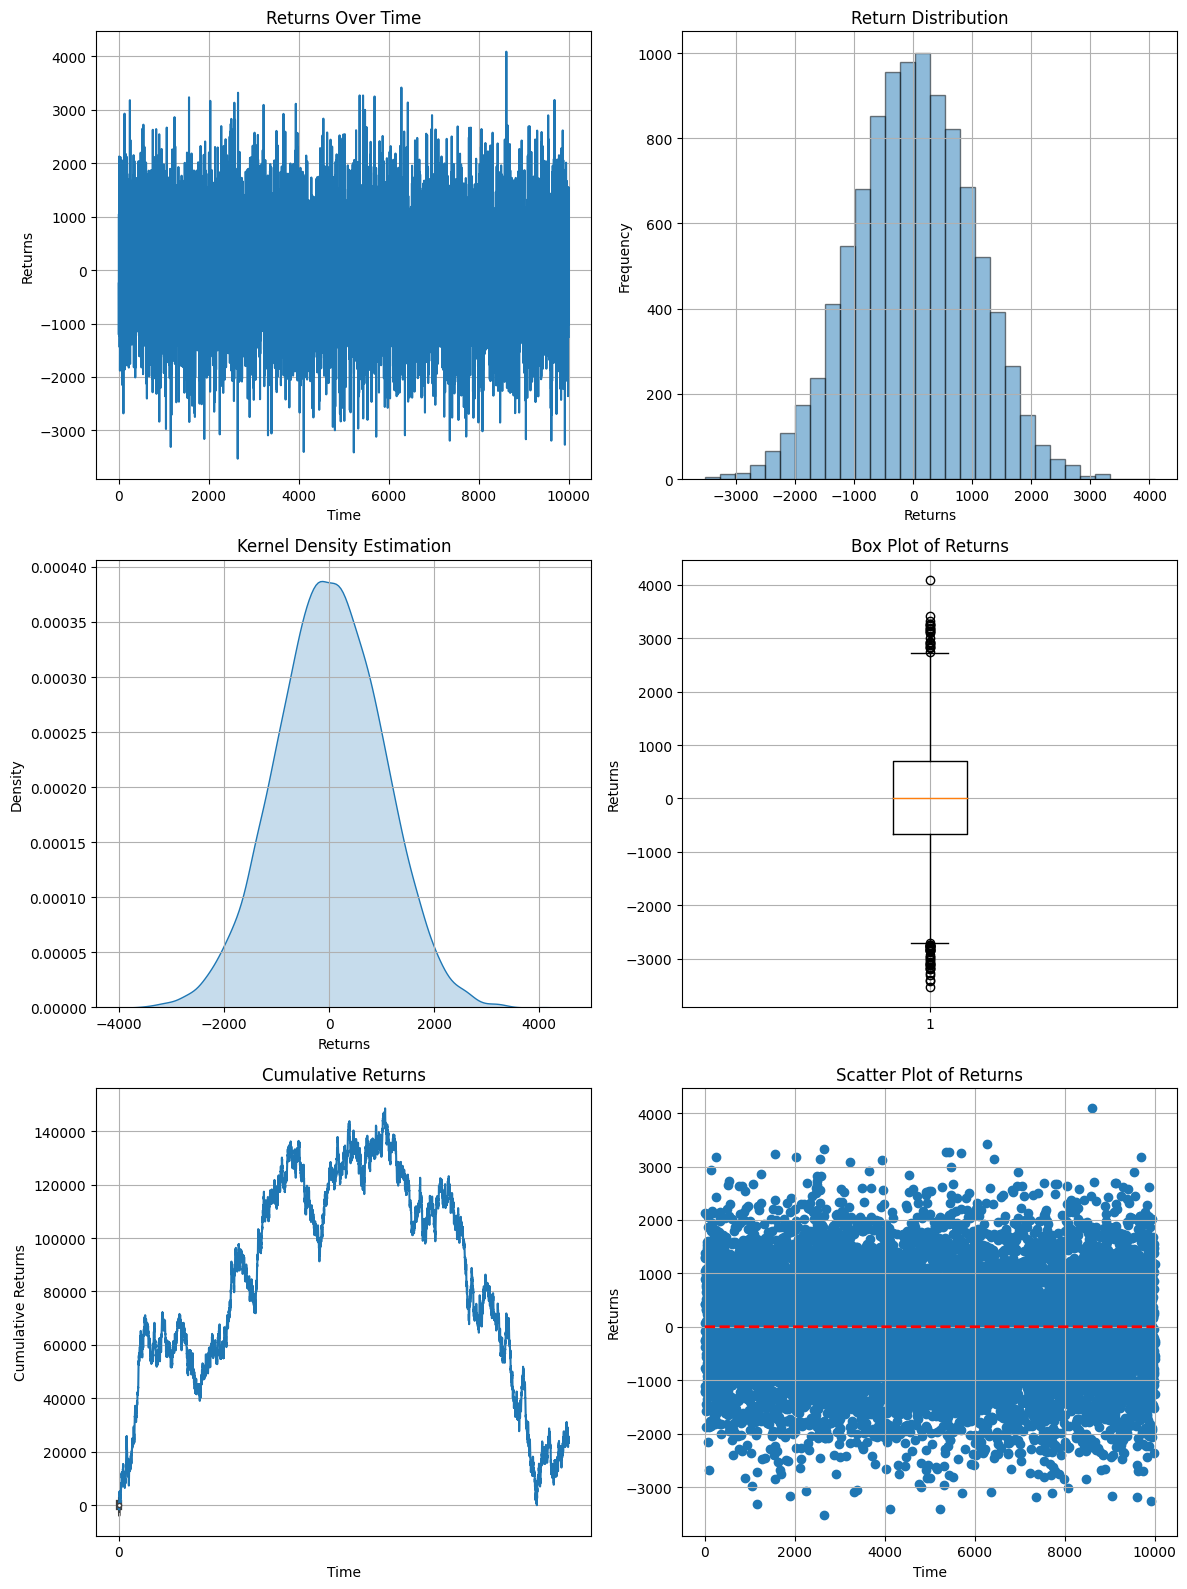

<Figure size 1000x600 with 0 Axes>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample returns data
returns = np.random.normal(loc=0, scale=1000, size=num_simulations)  # Daily returns for 250 days

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 16))

# Line plot of returns over time
axes[0, 0].plot(returns)
axes[0, 0].set_title("Returns Over Time")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Returns")
axes[0, 0].grid(True)

# Histogram of returns
axes[0, 1].hist(returns, bins=30, edgecolor='black', alpha=0.5)
axes[0, 1].set_title("Return Distribution")
axes[0, 1].set_xlabel("Returns")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].grid(True)

# Kernel density estimation (KDE) plot
sns.kdeplot(returns, shade=True, ax=axes[1, 0])
axes[1, 0].set_title("Kernel Density Estimation")
axes[1, 0].set_xlabel("Returns")
axes[1, 0].set_ylabel("Density")
axes[1, 0].grid(True)

# Box plot
axes[1, 1].boxplot(returns)
axes[1, 1].set_title("Box Plot of Returns")
axes[1, 1].set_ylabel("Returns")
axes[1, 1].grid(True)

# Violin plot
sns.violinplot(returns, ax=axes[2, 0])
axes[2, 0].set_title("Violin Plot of Returns")
axes[2, 0].set_ylabel("Returns")
axes[2, 0].grid(True)

# Scatter plot with a line of zero returns
axes[2, 1].scatter(range(len(returns)), returns)
axes[2, 1].plot(range(len(returns)), [0] * len(returns), color='red', linestyle='dashed', linewidth=2)
axes[2, 1].set_title("Scatter Plot of Returns")
axes[2, 1].set_xlabel("Time")
axes[2, 1].set_ylabel("Returns")
axes[2, 1].grid(True)

# Adjust spacing between subplots
fig.tight_layout()

# Cumulative returns plot
cumulative_returns = np.cumsum(returns)
plt.figure(figsize=(10, 6))
axes[2, 0].plot(cumulative_returns)
axes[2, 0].set_title("Cumulative Returns")
axes[2, 0].set_xlabel("Time")
axes[2, 0].set_ylabel("Cumulative Returns")
axes[2, 0].grid(True)

# Show the figure
plt.show()


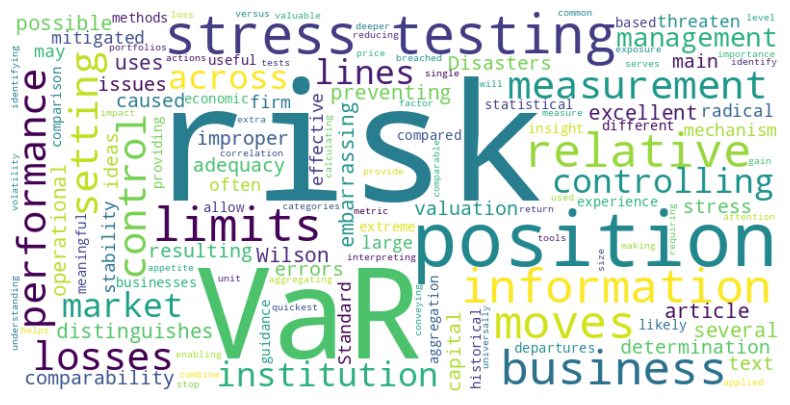

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the text
text = "In an excellent article, Wilson (1998) distinguishes several possible uses of VaR: preventing embarrassing losses, setting operational risk limits, risk comparability, determination of capital adequacy, and performance measurement. **The main ideas of this text are:**"

text = text + "1. VaR and stress testing cannot control losses caused by improper controls or valuation errors. Disasters resulting from these issues cannot be mitigated by VaR or stress testing."
text = text + "2. Standard VaR may not be an effective controlling mechanism for large market moves that threaten a firm's stability, as such moves are often radical departures from historical experience."
text = text + "3. Stress testing, based on economic insight, is more likely to be useful for controlling extreme market moves compared to statistical methods."
text = text + "4. Both VaR and stress testing allow meaningful comparison and aggregation between different businesses, providing guidance for interpreting the relative importance of each risk factor and aggregating risk categories at the business unit or institution level."
text = text + "5. VaR serves as a common metric that can be universally applied across all risk positions or portfolios, enabling institutions to gain a deeper understanding of their risk exposure and appetite."
text = text + "6. VaR and stress tests combine position size, price volatility, and correlation to provide a single measure of risk that is comparable across all business lines, making them valuable tools for conveying risk information to management."
text = text + "7. The information on relative risk of positions can be used for setting stop-loss limits, identifying business lines and positions requiring extra management attention, and calculating risk versus return in performance measurement."
text = text + "8. When risk limits are breached, the information on relative risk helps identify actions that will have the quickest impact in reducing risk."

#text = text + "Given the importance of **reports on the contributions of risk positions to VaR and stress tests**, careful attention to the design of these reports will have large payoffs in better management processes and in appreciation of the value of the risk function. The **Goldman Sachs report "Hot Spots and Hedges"** by Litterman (1997a, 1997b) is considered a classic work in this area. **Section 11.2.2 of Dowd (2005)** provides a succinct précis of these ideas.Here are the main points to consider:1. **Different types of decomposition** are needed for reporting, including business lines and trading desks for performance measurement, trading positions that span across trading desks for understanding the firm's risk structure, and identifying targets for risk reduction. 2. Reporting needs to **accommodate organization structure** and highlight critical risks. Some reports should be organized hierarchically to align with management's understanding of businesses, while others should be organized from largest to smallest risk to ensure awareness of the most significant risks and facilitate risk reduction. 3. **Drill-down capability** should be incorporated into all reports to break down risks that require extra attention.4. **Meaningful categorization** of risks, relevant to businesses and management, enhances the ability to take quick actions to reduce risk and improves management's understanding of risk. Similar guidance for informative reporting of nonstatistical positions should be followed.5. **VaR and stress test risk** for interest rate positions, for example, should be reported based on exposure to parallel shifts of the yield curve and changes in steepness of the curve. 6. **Designing optimization procedures** to identify small portfolios that can replicate a large portion of VaR or stress test risk is useful for quick hedging and conveying an intuitive understanding of the firm's major position components. 7. When reporting the **contribution of product lines, trading desks, and risk components** to overall firm risk, several approaches must be considered:    - Representing each component by its **scenario risk measure** as a stand-alone portfolio.    - Representing each component by the **impact on total firm risk** if that risk component were fully eliminated.    - Representing each component by its **marginal impact on total firm risk**, capturing correlation effects and immediate impact on firm risk.It may be best to use a **combination of stand-alone risk measures** and marginal impact measures to ensure components with the potential for large risk contributions receive timely management focus.The **main ideas** of this text are as follows:1. The **marginal impact measure** is a useful tool in risk assessment and can be used to calculate the total risk measure for a firm. 2. The **marginal impact** is equivalent to the **component VaR** used by Dowd (2005, Section 11.2.1), which is convenient for exercises like allocation to business lines of firm capital. 3. A risk measure should scale directly with position size, meeting the **homogeneity condition** satisfied by VaR and stress testing measures.4. The **weighted sum of marginal impacts** weighted by position size equals the total risk of the portfolio.5. VaR and stress scenario losses are useful for placing limits on businesses and controlling against financial disasters.6. Other non-statistical limits, along with VaR and stress scenarios, are needed to control a trading business effectively.7. An **adequate capital cushion** is necessary to mitigate potential losses due to earnings volatility and market moves.8. Regulatory requirements often favor VaR as a measure for determining capital adequacy, as it is less susceptible to manipulation compared to stress scenarios.9. Performance measurement should adjust P&L performance for the level of risk taken, and a mix of VaR and stress loss measures is ideal.10. Subjectivity of stress scenarios and reliance on VaR in regulatory capital have led most firms to base their risk measures solely on VaR.11. The firm Chase Manhattan (now JPMorgan Chase) has utilized both VaR and stress loss measures successfully.12. Chase's experience during the Asian credit crisis led to the conclusion that tying risk adjustment of business units to stress losses incentivizes reduced vulnerability to market shocks.13. Adjusting P&L return for risk involves calculating measures like **risk-adjusted return on capital (RAROC)** and **shareholder value added (SVA)**, which are not discussed in this text."

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
